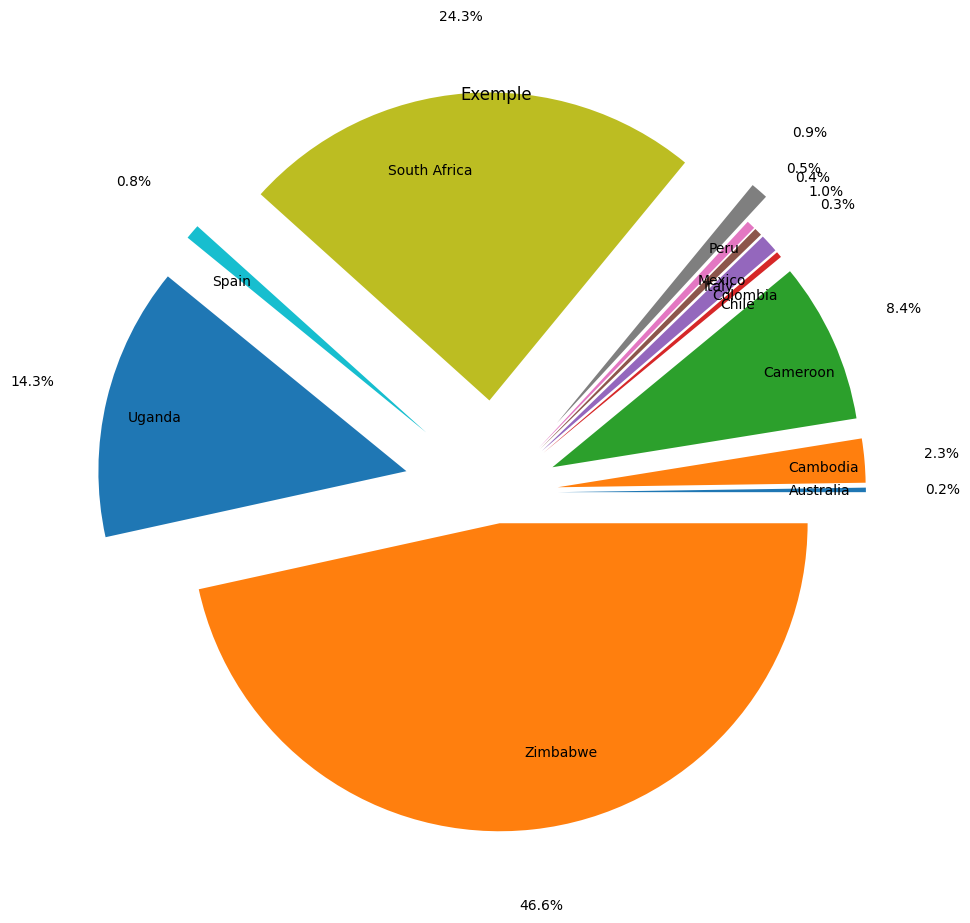

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
df_habitant = pd.read_csv("../../csvs/world_population.csv")

df_habitant = df_habitant[['Country/Territory', '2000 Population']]

countries = ["Colombia", "Chile", "Mexico", "Peru", "Italy", "Spain", "Cameroon", "South Africa", "Uganda", "Zimbabwe", "Australia", "Cambodia"]

filtered_countries_habitant = df_habitant[df_habitant['Country/Territory'].isin(countries)]

filtered_countries_habitant.to_csv("habitants_2000.csv", index=False)

# print(filtered_countries_habitant)

df_sida = pd.read_csv("../../csvs/no_of_people_living_with_hiv_by_country_clean.csv", sep=',')

df_sida = df_sida[['Country','Count_median','Year']]



df_sida = df_sida[df_sida["Year"]==2000]
df_sida = df_sida[['Country','Count_median']]

countries = ["Colombia", "Chile", "Mexico", "Peru", "Italy", "Spain", "Cameroon", "South Africa", "Uganda", "Zimbabwe", "Australia", "Cambodia"]

filtered_countries_sida = df_sida[df_sida['Country'].isin(countries)]
filtered_countries_sida.to_csv("habitants_with_sida_2000.csv", index=False)

df_merged = pd.merge(filtered_countries_habitant, filtered_countries_sida, left_on='Country/Territory', right_on='Country')

df_merged = df_merged.drop(columns=['Country'])

df_merged = df_merged.rename(columns={'Country/Territory': 'Country' ,'2000 Population': 'Population_2000', 'Count_median': 'Median_Count_2000'})

population = df_merged[['Population_2000']].astype(float)
sida = df_merged[['Median_Count_2000']].astype(float)


koeff = sida.values/population.values
df_merged.insert(3, "Koeff %", koeff * 100, True)
# print(df_merged)


sizes = df_merged['Koeff %']
# print(len(sizes))
labels = df_merged['Country']
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red' , 'blue']
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.1) 
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', pctdistance=1.25, labeldistance=0.75)
ax1.set_title("Exemple")
plt.show()


